In [50]:
import pandas as pd
import numpy as np 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# Get the data
data = pd.read_csv('./dataset/kerala_flood.csv')

In [86]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,...,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood,avgjune,sub
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,...,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,0,274.866667,649.9
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,...,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,1,130.300000,256.4
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,...,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,0,186.200000,308.9
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,...,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,0,366.066667,862.5
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,...,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,0,283.400000,586.9


In [90]:
# data.info()

In [24]:
 # Create data visualization 
# Create scatterplot of Urbanization vs ClimateChange where the points are colored by the FloodProbability

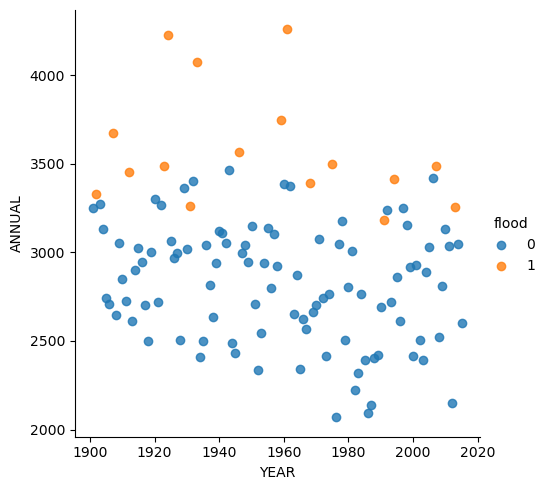

In [82]:
# sns.lmplot(x='Urbanization', y='ClimateChange',data=data, hue='FloodProbability', fit_reg=False, palette='coolwarm',aspect=1)
# sns.lmplot(x='Urbanization', y='ClimateChange',data=data,fit_reg=False,aspect=1)
sns.lmplot(x='YEAR', y='ANNUAL',data=data, hue='flood', fit_reg=False,aspect=1)
plt.show()

In [64]:
# Kmeans Cluster Creation 
from sklearn.cluster import KMeans
# ---> the clusters are going to be two since we have 0, 1
kmeans = KMeans(n_clusters=2)

In [96]:
# Fitting the model 
# 1. Drop the columns not required
columns_to_drop = ['avgjune','sub']
df = data.drop(columns=columns_to_drop)

In [98]:
kmeans.fit(df.drop('flood', axis=1))

KMeans(n_clusters=2)

In [100]:
# Find the cluster center vectors
kmeans.cluster_centers_

array([[1964.5       ,   10.34310345,   16.6862069 ,   35.24655172,
         111.63103448,  199.67586207,  580.56896552,  594.38793103,
         372.37586207,  196.73448276,  295.55517241,  154.13448276,
          36.49655172, 2603.82931034,   27.02413793,  346.53448276,
        1744.05862069,  486.19137931],
       [1951.38596491,   14.18421053,   14.28596491,   38.41052632,
         109.49824561,  260.61754386,  729.32982456,  809.3877193 ,
         472.44912281,  295.36140351,  292.66491228,  173.15087719,
          43.46491228, 3252.78947368,   28.46666667,  408.5122807 ,
        2306.51403509,  509.28245614]])

In [118]:
# Evaluating the kmeans
# -> Create a new column for the data frame called cluster which 'Yes' will present flood and 'No' will present no flood
def converter(flood):
    if flood == 1:
        return 1
    else:
        return 0
    


In [122]:
df['Cluster'] = df['flood'].apply(converter)

In [124]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,flood,Cluster
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1,0,0
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2,1,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1,0,0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3,0,0
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1,0,0


In [108]:
# Confusion matrix and clasiffication port to see how the model works without being given labels
from sklearn.metrics import confusion_matrix, classification_report

In [128]:
print(confusion_matrix(df['Cluster'], kmeans.labels_))
print(classification_report(df['Cluster'], kmeans.labels_))

[[58 41]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        99
           1       0.28      1.00      0.44        16

    accuracy                           0.64       115
   macro avg       0.64      0.79      0.59       115
weighted avg       0.90      0.64      0.70       115

